# Tutorial 5: Linear equations and vector field visualisation

Consider a quantum system in a state $|\Psi \rangle$:

$$
\Psi = \frac{1}{\sqrt{3}}
\begin{bmatrix}
i  \\
-i \\
i  \\
\end{bmatrix}
$$

The Hamiltonian of the system is given by:

$$
\hat{H} = 
\begin{bmatrix}
2 & 1 & 0 \\
1 & 2 & 0 \\
0 & 0 & 3 \\
\end{bmatrix}
$$

In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

#### a. Determine the eigenvalues and eigenvectors of the Hamiltonian. What do the eigenvalues represent?


In [6]:
# Define the Hamiltonian matrix

H = np.array([
            [2., 1., 0.],
            [1., 2., 0.],
            [0., 0., 3.]
            ])

print("Hamiltonian matrix: \n", H)

Hamiltonian matrix: 
 [[2. 1. 0.]
 [1. 2. 0.]
 [0. 0. 3.]]


In [7]:
# Find the eigenvalues and eigenvectors of the Hamiltonian matrix
eigenvalues, eigenvectors = np.linalg.eig(H)

print("Eigenvalues: ", eigenvalues)

print("Eigenvectors: \n", eigenvectors)

Eigenvalues:  [3. 1. 3.]
Eigenvectors: 
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


#### b. Which eigenvalue of $\hat{H}$ is most likely to emerge from a measurement?

In [8]:
# Define the state vector
psi = np.array([1.j  /np.sqrt(3),
                -1.j / np.sqrt(3),
                1.j  / np.sqrt(3)])

print("State vector: ", psi)

State vector:  [ 0.+0.57735027j -0.-0.57735027j  0.+0.57735027j]


In [10]:
# Get the eigenvecor corresponding to the lowest eigenvalue

eig_vec_1 = eigenvectors[0]
eig_vec_2 = eigenvectors[1]
eig_vec_3 = eigenvectors[2]

print("Eigenvector 1: ", eig_vec_1)
print("Eigenvector 2: ", eig_vec_2)
print("Eigenvector 3: ", eig_vec_3)


Eigenvector 1:  [ 0.70710678 -0.70710678  0.        ]
Eigenvector 2:  [0.70710678 0.70710678 0.        ]
Eigenvector 3:  [0. 0. 1.]


to compute the probability we need to compute the projection of the state on the eigenvectors of the Hamiltonian. The probability of measuring an eigenvalue $\lambda_i$ is given by:

$$
P(\lambda_i) = \frac{| \langle \psi_i | \Psi\rangle|^2}{\langle \Psi | \Psi \rangle}
$$

In [13]:
# Then, let's calculate the probability of measuring the state vector in the first eigenvector
p1 = np.dot(eig_vec_1, psi) ** 2 / np.dot(psi, psi)
p2 = np.dot(eig_vec_2, psi) ** 2 / np.dot(psi, psi)
p3 = np.dot(eig_vec_3, psi) ** 2 / np.dot(psi, psi)

print("Probability of measuring the state vector in the first eigenvector: ", np.abs(p1))
print("Probability of measuring the state vector in the second eigenvector: ", np.abs(p2))
print("Probability of measuring the state vector in the third eigenvector: ", np.abs(p3))


Probability of measuring the state vector in the first eigenvector:  0.6666666666666665
Probability of measuring the state vector in the second eigenvector:  0.0
Probability of measuring the state vector in the third eigenvector:  0.33333333333333337


The most likely eigenvalue is $E_1 = 3$ for $|\psi_1\rangle = [ 0.70710678, -0.70710678, 0.] $

c. Find $\langle \hat{H} \rangle$, $\langle \hat{H}^2 \rangle$, and $\Delta H$.

In [16]:
# Let's find the expectation value of the H
H_exp = np.dot(np.dot(np.conjugate(psi), H), psi)

print("Expectation value of the Hamiltonian: ", np.abs(H_exp))

Expectation value of the Hamiltonian:  1.6666666666666672


In [21]:
# Let's find the expectation value of the H^2
H_2_exp = np.dot(np.dot(np.conjugate(psi), H @ H), psi)

print("Expectation value of the Hamiltonian squared: ", np.abs(H_2_exp))

Expectation value of the Hamiltonian squared:  3.666666666666668


In [24]:
# Now lets calculate the uncertainty in the Hamiltonian
sigma = np.sqrt(H_2_exp - H_exp ** 2)

print("sigma: ", np.abs(sigma))

sigma:  0.9428090415820631


### 3. (4 points) Stochastic 2D velocity fields
    
   
This problem aims at producing stochastic velocity fields in 2D, which can then be compared with simulatons of 2D turbulence.

(a) Generate a 2D meshgrid with $x \in [-2,2]$ an $y \in [-2,2]$ and $[N \times N]=[200 \times 200]$ grid cells
   
(b) Create a Python function that takes $N=200$ as an argument and returns 2D arrays with the x- and y-components of 3 stochastic velocity fields:

- A random field. **Hint:** use np.random.rand()
   
- A Gaussian random field. **Hint:** use np.random.randn()
    
- A log-normal random field. **Hint:** use np.random.lognormal()
    
**Notes:** In all cases, you can use any default values as fiducial parameters or any values that you consider adequate because the distributions can always be re-normalised. Also, remember that the seed needs to be fixed (see np.random.seed()) when you generate random numbers so that the results are reproducible.
    
(c) Calculate the modulus of each stochastic velocity field, and make a three-panel plot showing the three 1D histograms of the modulus of each velocity field.
    
(d) Make a three-panel plot showing the 3 maps of the resulting moduli of the velocity fields. Comment on the results from (c) and (d), how these stochastic velocity fields differ from one another?"
   

#### (a) Generate a 2D meshgrid with $x \in [-2,2]$ an $y \in [-2,2]$ and $[N \times N]=[200 \times 200]$ grid cells

In [26]:
# Define N
N = 200

# Define the x and y vectors
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

# Create the meshgrid
X, Y = np.meshgrid(x, y)

#### (b) Create a Python function that takes $N=200$ as an argument and returns 2D arrays with the x- and y-components of 3 stochastic velocity fields:

- A random field. **Hint:** use np.random.rand()
   
- A Gaussian random field. **Hint:** use np.random.randn()
    
- A log-normal random field. **Hint:** use np.random.lognormal()
    
**Notes:** In all cases, you can use any default values as fiducial parameters or any values that you consider adequate because the distributions can always be re-normalised. Also, remember that the seed needs to be fixed (see np.random.seed()) when you generate random numbers so that the results are reproducible.
    

In [68]:
def stochastic_velocity_fields(N):

    # Set the seed
    np.random.seed(30)

    # Create the random fields
    random_field = np.random.rand(N, N)

    # Create the Gaussian random field
    gaussian_random_field = np.random.randn(N, N)

    # Create the log-normal random field
    log_normal_random_field = np.random.lognormal(mean=0, sigma=1, size=(N, N))
    
    
    return random_field, gaussian_random_field, log_normal_random_field


#### (c) Calculate the modulus of each stochastic velocity field, and make a three-panel plot showing the three 1D histograms of the modulus of each velocity field.

In [69]:
# Call the function
random_field, gaussian_random_field, log_normal_random_field = stochastic_velocity_fields(N)

print(random_field.shape)

(200, 200)


In [70]:
#(c) Calculate the modulus of each stochastic velocity field, and make a three-panel plot showing the three 1D histograms of the modulus of each velocity field.

# Calculate the modulus of each stochastic velocity field
mod_random_field = np.abs(random_field)
mod_gaussian_random_field = np.abs(gaussian_random_field)
mod_log_normal_random_field = np.abs(log_normal_random_field)

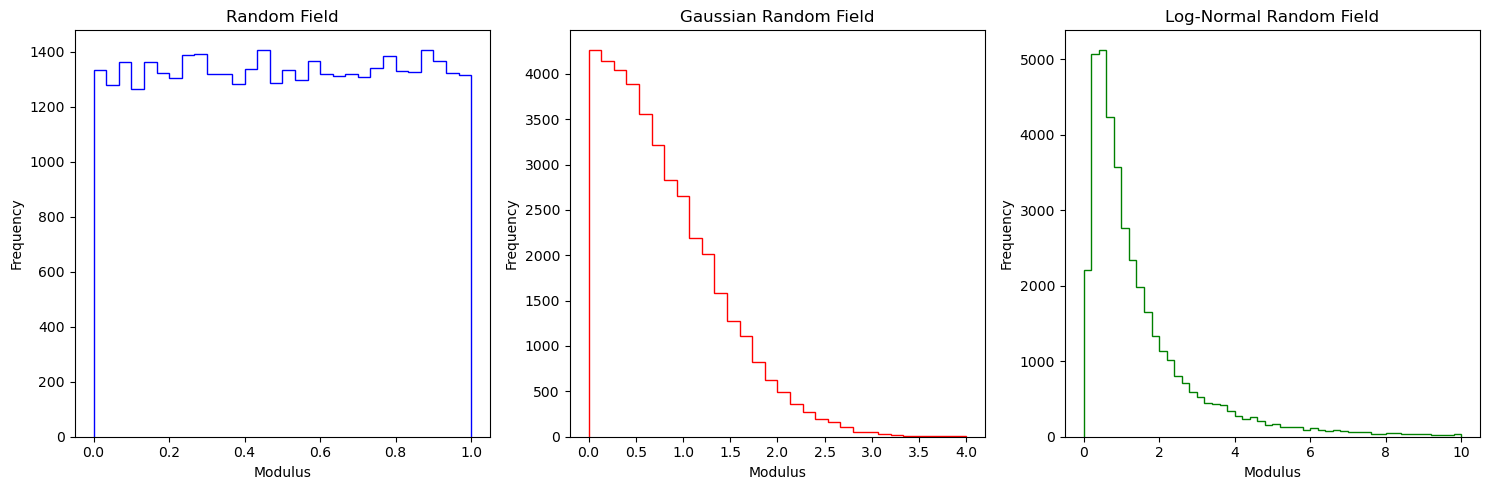

In [76]:
# Create the figure and the axes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histograms
ax[0].hist(mod_random_field.flatten(),histtype = "step" ,bins=30, range=(0, 1), color='b')
ax[0].set_title('Random Field')
ax[0].set_xlabel('Modulus')
ax[0].set_ylabel('Frequency')

ax[1].hist(mod_gaussian_random_field.flatten(), histtype = "step", bins=30, range=(0, 4), color='r')
ax[1].set_title('Gaussian Random Field')
ax[1].set_xlabel('Modulus')
ax[1].set_ylabel('Frequency')

ax[2].hist(mod_log_normal_random_field.flatten(),histtype = "step",  bins=50,range=(0, 10), color='g')
ax[2].set_title('Log-Normal Random Field')
ax[2].set_xlabel('Modulus')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### (d) Make a three-panel plot showing the 3 maps of the resulting moduli of the velocity fields. Comment on the results from (c) and (d), how these stochastic velocity fields differ from one another?"

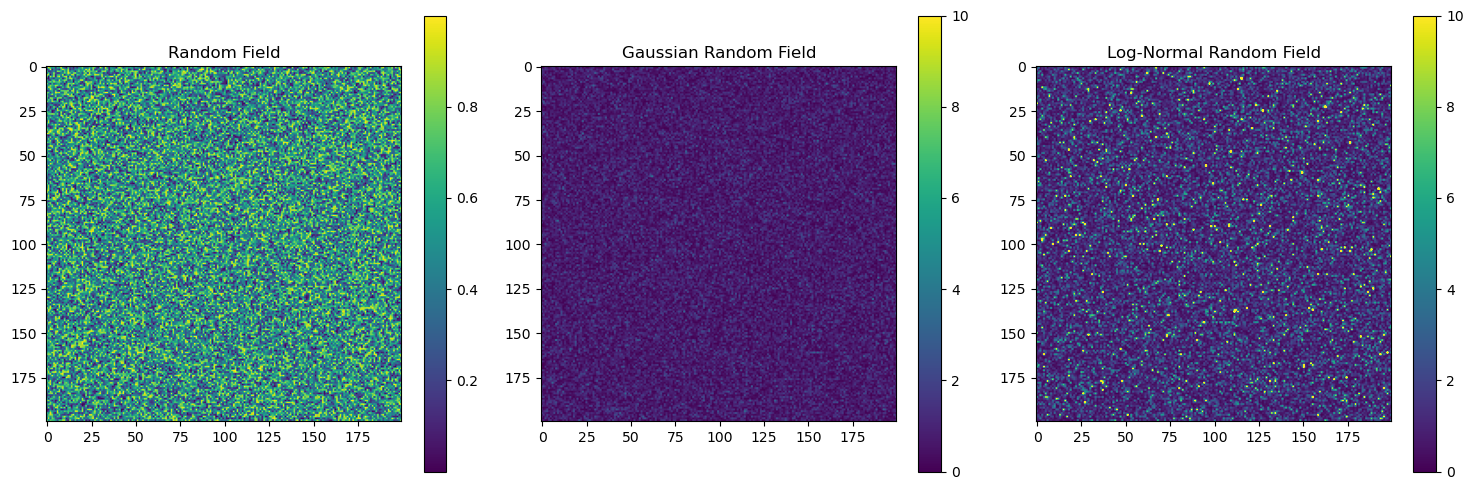

In [77]:
# (d) Make a three-panel plot showing the 3 maps of the resulting moduli of the velocity fields. Comment on the results from (c) and (d), how these stochastic velocity fields differ from one another?"

# Create the figure and the axes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the maps
im0 = ax[0].imshow(mod_random_field, cmap='viridis')
ax[0].set_title('Random Field')
fig.colorbar(im0, ax=ax[0])

im1 = ax[1].imshow(mod_gaussian_random_field, cmap='viridis', vmin = 0, vmax = 10)
ax[1].set_title('Gaussian Random Field')
fig.colorbar(im1, ax=ax[1])

im2 = ax[2].imshow(mod_log_normal_random_field, cmap='viridis', vmin = 0, vmax = 10)
ax[2].set_title('Log-Normal Random Field')
fig.colorbar(im2, ax=ax[2])

plt.tight_layout()
plt.show()